In [60]:
# Mengimport Library yang akan digunakan
import numpy as np
import matplotlib.pyplot as plt
import cv2

[[0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]
 [0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]
 [0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]
 [0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]
 [0.02857143 0.02857143 0.02857143 0.02857143 0.02857143]]


(-0.5, 1078.5, 1122.5, -0.5)

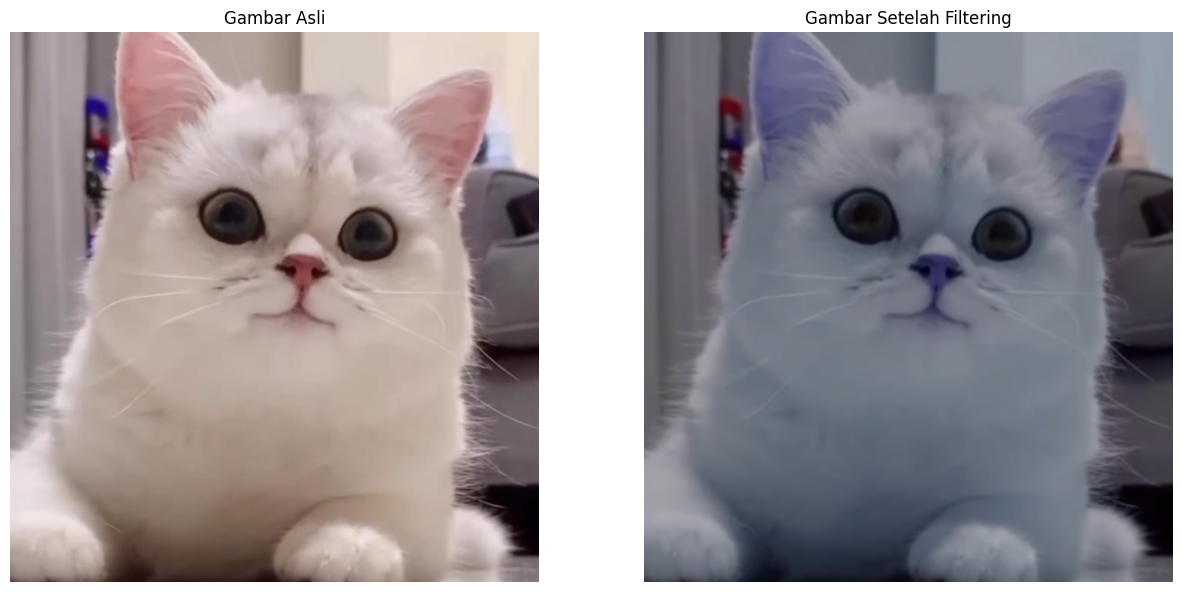

In [61]:
# BGR
img = cv2.imread('images/smile_cat.jpg')

# RGB
cat = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
# cv2.imshow('Gambar Asli', img)
# cv2.waitKey(0)

# plt.imshow(img)
# plt.title('Gambar Asli')
# plt.show()

# membuat filter: matriks berukuran 5 x 5 
kernel = np.ones((5,5),np.float32)/35
print(kernel)

# lakukan filtering
cat_filter = cv2.filter2D(img, -1, kernel)

# cv2.imshow('Gambar Setelah Filtering', cat_filter)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# plt.imshow(cat_filter)
# plt.title('Gambar Setelah Filtering')
# plt.show()

# Membuat figure subplot  dengan ukuran 1 baris dan 2 kolom
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

# Menampilkan citra original dan citra hasil averaging
ax[0].imshow(cat)
ax[0].set_title("Gambar Asli")
ax[1].imshow(cat_filter)
ax[1].set_title("Gambar Setelah Filtering")

# Menghilangkan sumbu x dan y pada kedua gambar
ax[0].axis('off')
ax[1].axis('off')

In [64]:
cat_blur = cv2.blur(cat, (5, 5))
cat_blur = cv2.cvtColor(cat_blur, cv2.COLOR_BGR2RGB)

cv2.imshow("Cat Blur", cat_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
# ini adalah cara lain untuk membuat sebuah kernel, 
# yaitu dengan menggunakan np.matrix
# kali ini, ukuran matriksnya 3 x 3
kernel = np.matrix([
          [1, 1, 1],
          [1, 2, 1],
          [1, 1, 1]         
          ])/25
print(kernel)

# buat lagi filteringnya
cat_filter = cv2.filter2D(img,-1,kernel)

# tampilkan
cv2.imshow("Cat Filter", cat_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.04 0.04 0.04]
 [0.04 0.08 0.04]
 [0.04 0.04 0.04]]


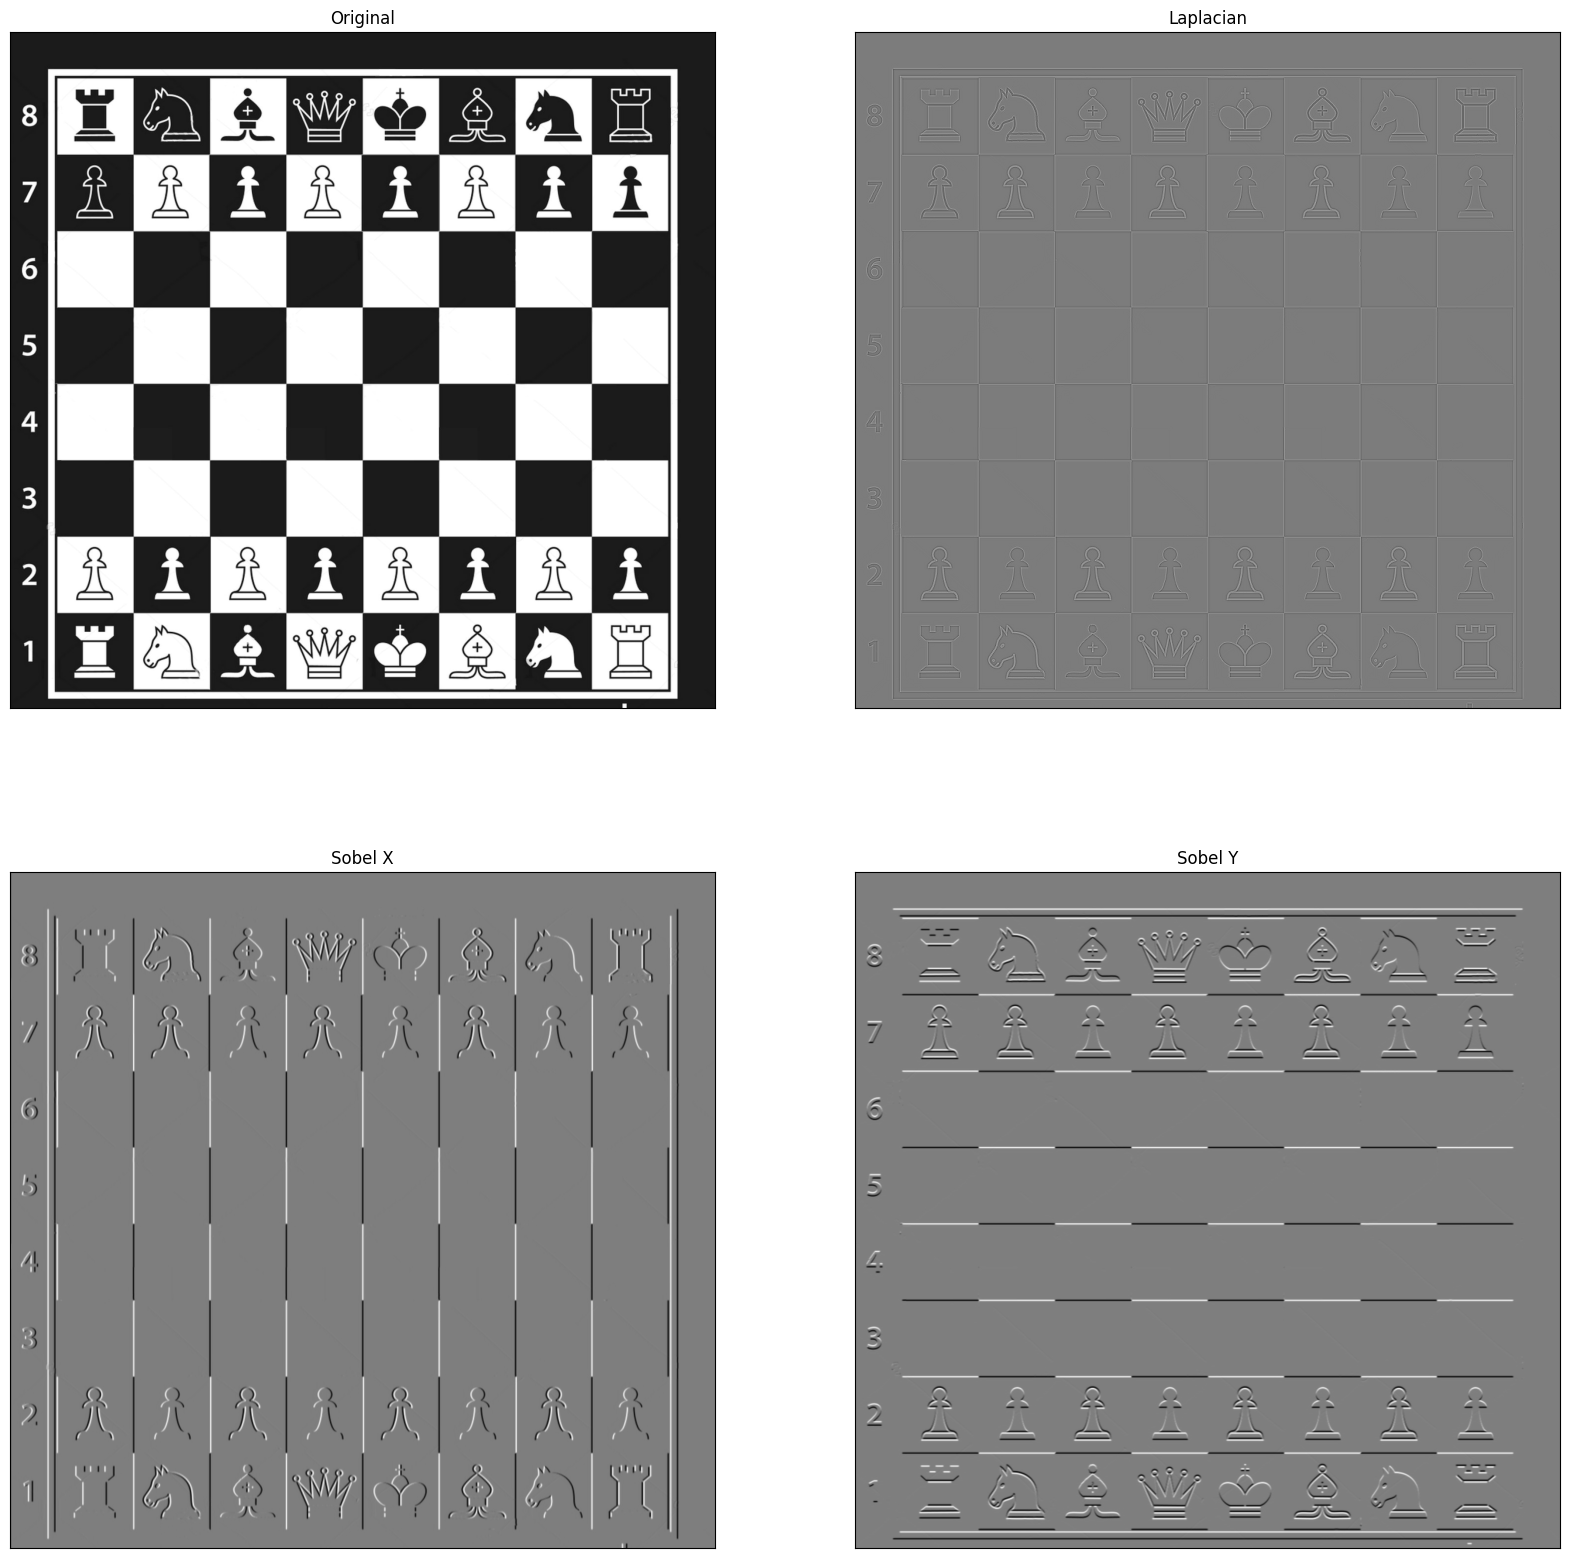

In [67]:
# Highpass Filter

# sebenarnya kita tidak perlu melakukan filtering lagi. Cukup sekali saja 
# di bagian awal, selama notebook ini tetap terhubung
import cv2
import numpy as np
from matplotlib import pyplot as plt


# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('images/catur.jpg',0)

# menerapkan algoritma high-pass filtering:
# laplacian
laplacian = cv2.Laplacian(img,cv2.CV_64F)

# sobel dengan ukuran kernel 5
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

# Catatan:
# CV_64F pada contoh di atas menunjukkan nilai bit dari citra 
# yang dihasilkan serta tipe datanya (F = Float)

# perbesar ukuran hasil plotting 
plt.rcParams["figure.figsize"] = (20,20)


# menampilkan hasil filter
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

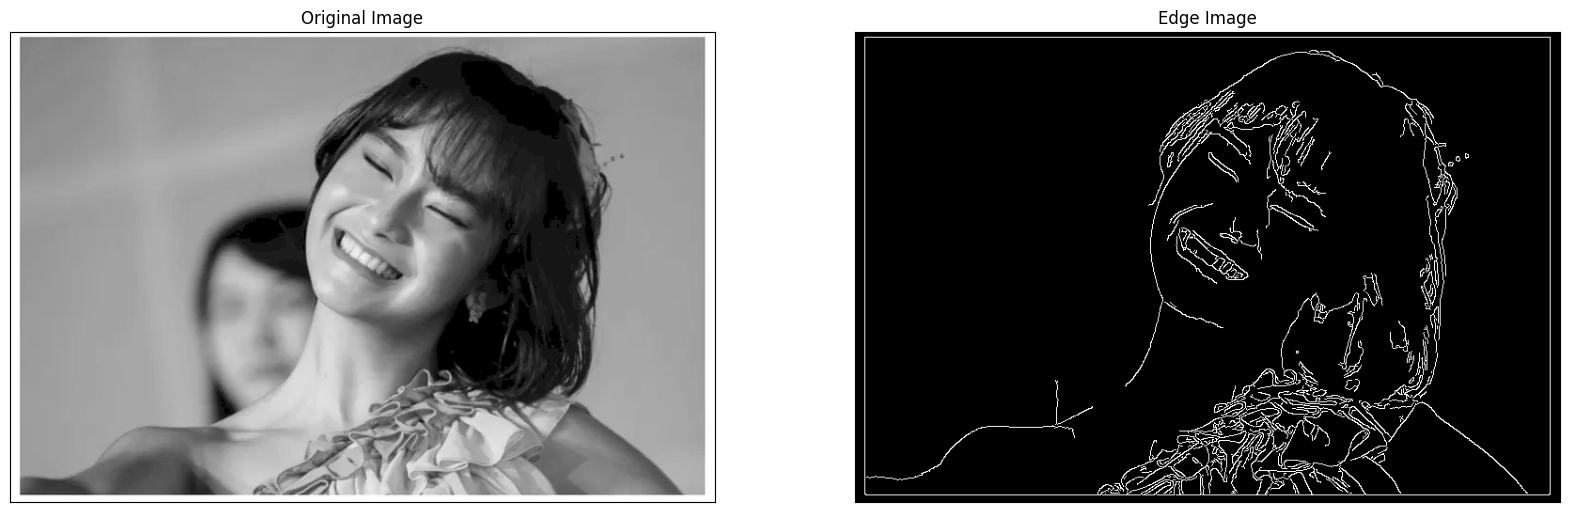

In [88]:
# memanggil citra sebagai grayscale (argument 0)
img = cv2.imread('images/freyajkt48.png',0)

# memanggil fungsi Canny Edges dengan argument (citra, nilai_min, nilai_max)
edges = cv2.Canny(img,60,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

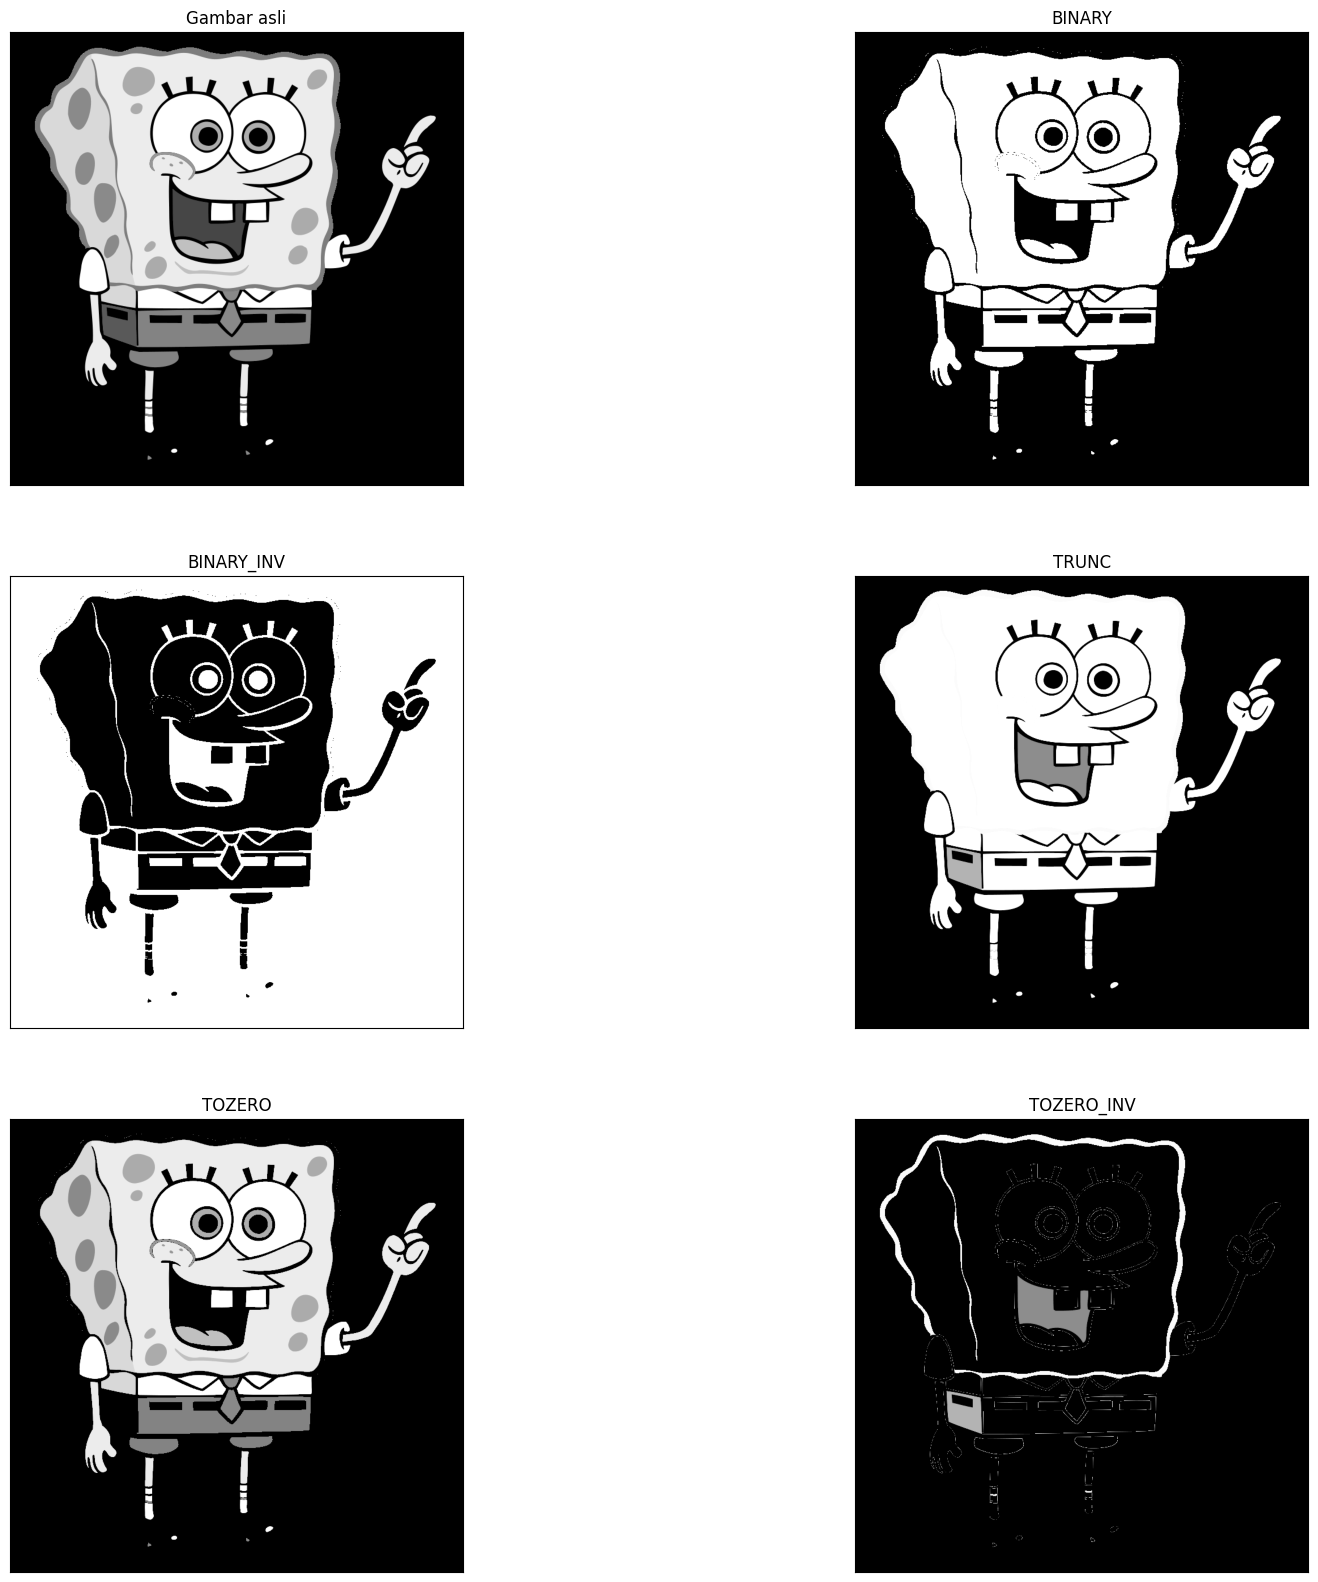

In [89]:
# membaca gambar spongebob
img = cv2.imread('images/spongebob.png',0)

# Hitungan threshold. 
# Perhatikan nilai ambang batas bawah dan atas dari tiap fungsi 
# yang diberikan
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

# menampilkan hasil
titles = ['Gambar asli','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

# menampilkan beberapa gambar sekaligus
for i in range(6):
    # 3 baris, 2 kolom
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

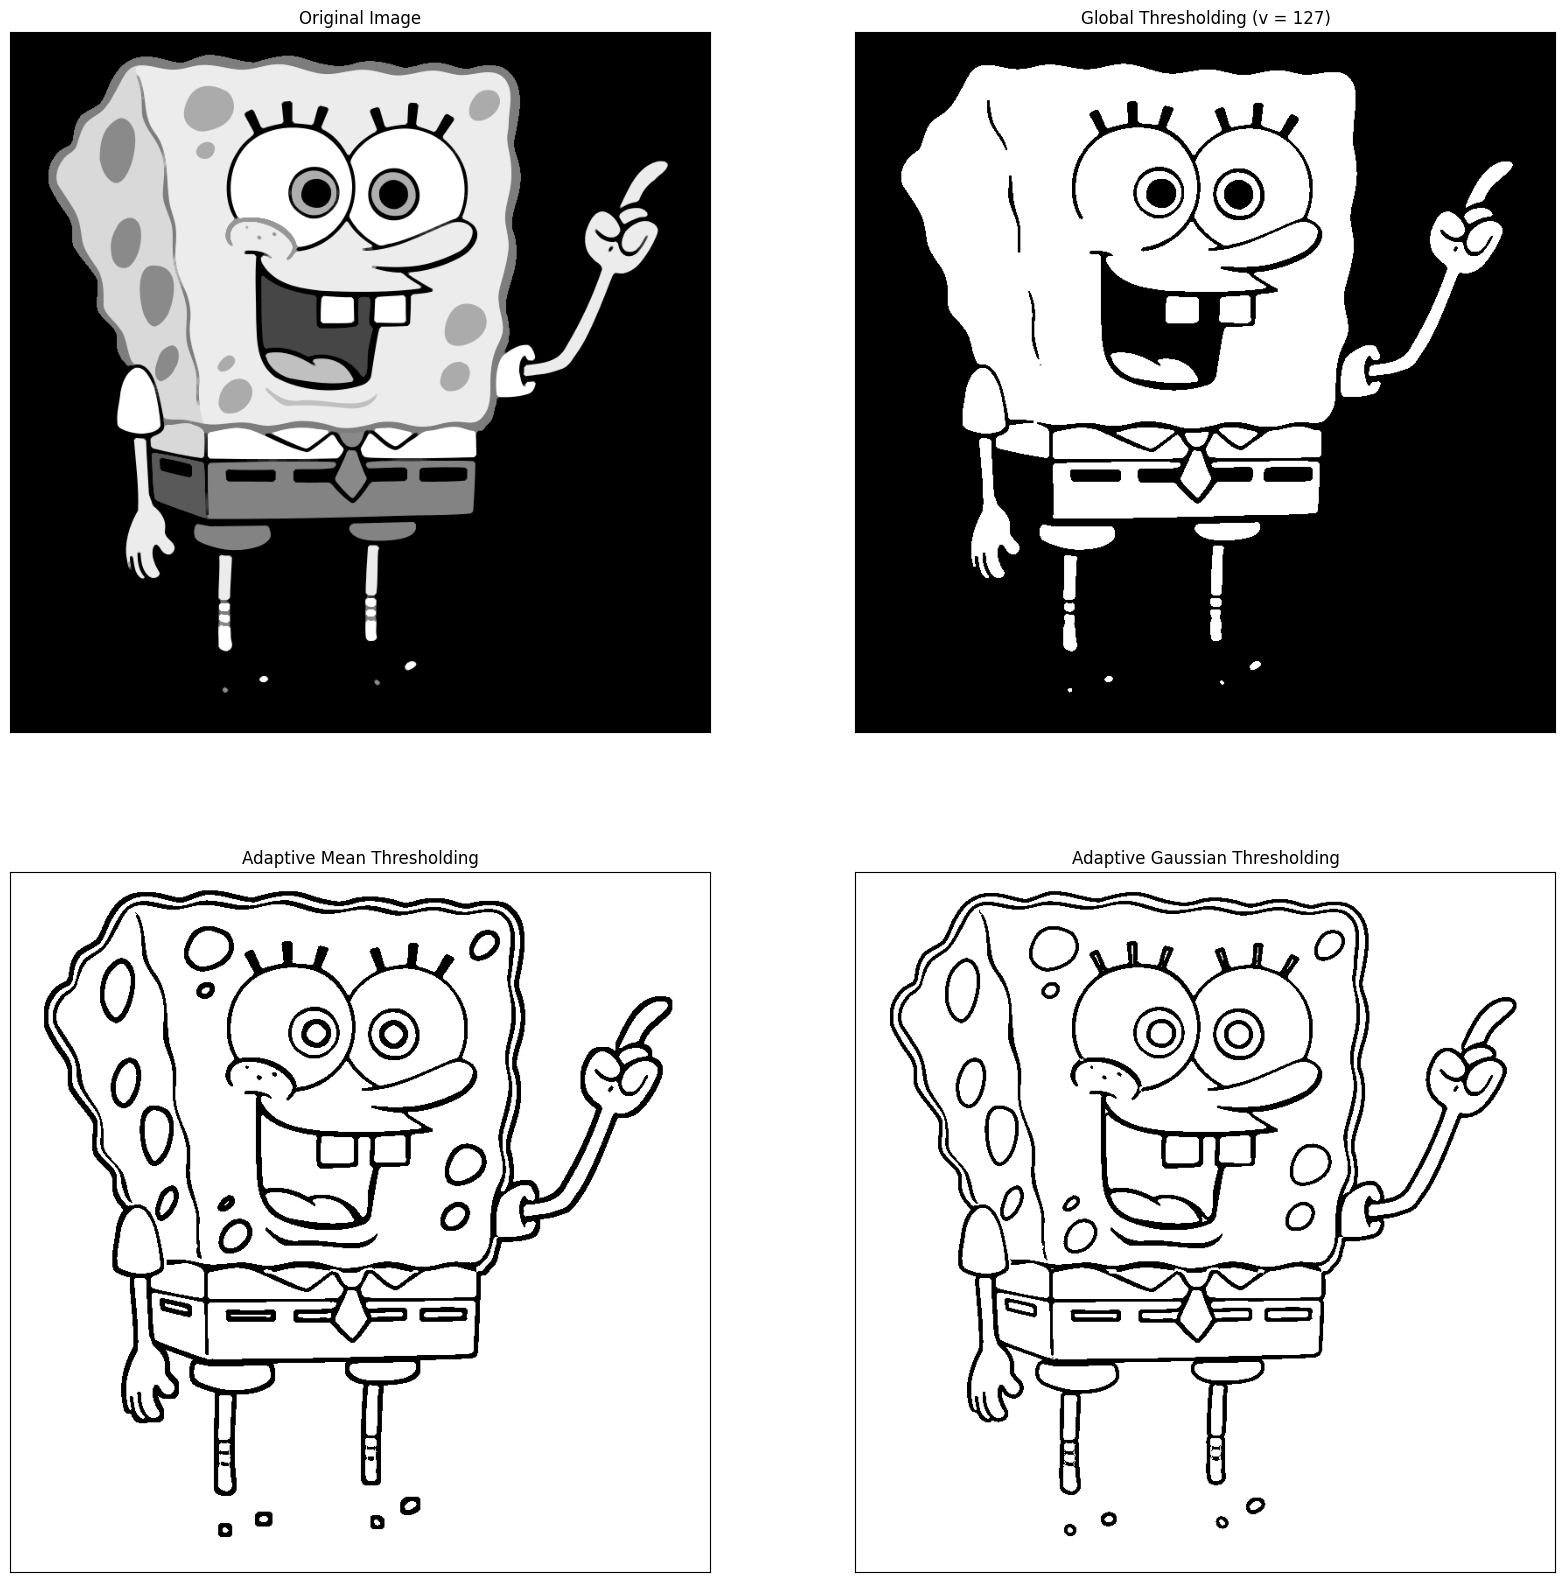

In [90]:
# masih menggunakan variabel img yang sama
#img = cv2.imread('images/baymax.jpg',0)

# digunakan median blur untuk menghaluskan tepi objek pada citra
# ini diperlukan agar thresholding memberikan hasil lebih baik
img = cv2.medianBlur(img,5)

# Lakukan Thresholding
# Binary Threshold
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Adaptive Threshold dengan Mean
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)

# Adaptive Threshold dengan Gaussian
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)


# Plotting
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

# menampilkan hasil
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()